## Monte Carlo Simulations
# 

In [2]:
# imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import datetime as dt
from pathlib import Path
from MCForecastTools import MCSimulation
import pylab
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#Read cancatenated CSV file
combined_data = Path("gold_btc.csv")
data = pd.read_csv(combined_data, index_col=0,parse_dates=True, infer_datetime_format=True, header=[0,1])
data

,GLD,BTC
,close,close
2017-05-18,118.8200,1825.549520
2017-05-19,119.4100,1926.201510
2017-05-22,119.8953,2110.906591
2017-05-23,119.1100,2192.909827
2017-05-24,119.6300,2367.351234
...,...,...
2021-03-25,161.8100,52125.759256
2021-03-26,162.2700,53243.124454
2021-03-29,160.3500,56915.629993


## MonteCarlo #1 - Portfolio with 10% GOLD and 90% BTC

In [8]:

# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_1 = MCSimulation(
    portfolio_data = data,
    weights = [0.1,0.9],
    num_simulation = 50,
    num_trading_days = 252*30
)

mc_1.portfolio_data.head()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,1.029861e+00,9.805423e-01,1.065393e+00,9.910335e-01,9.465079e-01,1.050618e+00,1.035933e+00,1.005637e+00,9.837116e-01,9.767894e-01,...,1.069174e+00,1.044333e+00,1.023529e+00,1.024242e+00,1.023881e+00,9.275826e-01,1.061377e+00,9.376743e-01,9.794240e-01,1.013191e+00
2,1.053911e+00,9.103700e-01,1.048144e+00,1.025851e+00,9.255835e-01,1.027046e+00,9.855465e-01,9.515415e-01,1.006862e+00,9.640123e-01,...,1.024616e+00,1.017171e+00,1.061451e+00,1.009721e+00,1.049125e+00,9.329754e-01,1.039325e+00,9.036467e-01,9.852900e-01,1.061799e+00
3,1.004218e+00,9.504605e-01,1.018983e+00,9.974747e-01,9.696462e-01,9.706067e-01,9.893165e-01,9.827097e-01,1.082602e+00,9.121728e-01,...,1.027465e+00,1.006195e+00,1.047514e+00,9.824088e-01,1.010249e+00,9.191523e-01,1.016340e+00,9.072295e-01,1.041314e+00,1.066444e+00
4,1.028541e+00,9.080099e-01,1.065558e+00,9.926665e-01,9.679687e-01,9.859847e-01,9.870138e-01,9.977554e-01,1.066289e+00,9.578151e-01,...,1.041248e+00,9.550977e-01,1.075430e+00,9.928868e-01,1.013838e+00,9.143827e-01,1.020616e+00,8.790600e-01,1.048693e+00,1.058038e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.049484e+13,6.316143e+11,2.035446e+08,1.065298e+12,2.121133e+12,1.409164e+10,2.050448e+09,2.116718e+14,3.169866e+12,1.558302e+11,...,1.586041e+13,5.574968e+11,1.201168e+11,9.814797e+09,5.089663e+10,7.165811e+10,4.076840e+11,2.059222e+10,2.401930e+07,4.580219e+09
7557,1.070083e+13,6.507642e+11,2.086344e+08,1.081965e+12,2.251012e+12,1.309914e+10,2.097057e+09,2.208226e+14,3.503722e+12,1.552195e+11,...,1.564518e+13,5.619644e+11,1.137172e+11,1.042412e+10,5.140817e+10,7.023029e+10,3.772852e+11,1.951412e+10,2.550648e+07,4.204963e+09
7558,1.040814e+13,6.160952e+11,2.091598e+08,1.056993e+12,2.212224e+12,1.281604e+10,2.059118e+09,2.268599e+14,3.470738e+12,1.571757e+11,...,1.492887e+13,5.440420e+11,1.080272e+11,1.042023e+10,5.370488e+10,7.511418e+10,3.716089e+11,1.821684e+10,2.591876e+07,4.222295e+09
7559,1.043759e+13,6.154810e+11,2.153261e+08,1.096752e+12,2.232395e+12,1.327059e+10,1.959270e+09,2.271195e+14,3.381574e+12,1.493081e+11,...,1.502062e+13,5.019947e+11,1.145397e+11,1.045983e+10,5.466679e+10,7.878711e+10,3.584109e+11,1.972653e+10,2.738650e+07,4.081300e+09


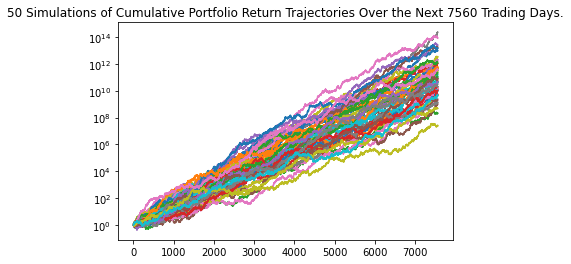

In [11]:
line_plot = mc_1.plot_simulation()
line_plot.set_yscale('log')
fig = line_plot.figure

#Save Figure as PNG for later use
fig.savefig('MC_1.png', bbox_inches='tight', pad_inches=0.1)

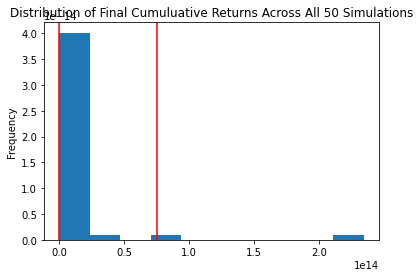

In [12]:
#Plot of probability distribution and confidence intervals
dist_plot = mc_1.plot_distribution()

In [18]:
# Create summary statistics from the Monte Carlo simulation results and print it
mc_1_sts = mc_1.summarize_cumulative_return()
print(mc_1_sts)

count           5.000000e+01
mean            8.126002e+12
std             3.521954e+13
min             2.576569e+07
25%             1.141477e+10
50%             8.230572e+10
75%             5.534399e+11
max             2.342428e+14
95% CI Lower    2.741002e+08
95% CI Upper    7.477054e+13
Name: 7560, dtype: float64


## MonteCarlo #2 - Portfolio with 20% GOLD and 80% BTC

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_2 = MCSimulation(
    portfolio_data = data,
    weights = [0.2,0.8],
    num_simulation = 50,
    num_trading_days = 252*30
)

mc_2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,9.434889e-01,9.688604e-01,9.695886e-01,1.025600e+00,1.019507e+00,9.758541e-01,1.026390e+00,9.866686e-01,9.966120e-01,1.066088e+00,...,9.816957e-01,9.875495e-01,9.987463e-01,9.712556e-01,9.644909e-01,1.010394e+00,1.013455e+00,9.842618e-01,9.906624e-01,9.701779e-01
2,9.099826e-01,9.999689e-01,1.009351e+00,1.013331e+00,1.059721e+00,9.692403e-01,1.035036e+00,1.035713e+00,1.016761e+00,1.115098e+00,...,9.874988e-01,9.945536e-01,1.017069e+00,9.838960e-01,1.001183e+00,1.058423e+00,1.037006e+00,1.060548e+00,1.027759e+00,9.933579e-01
3,8.616968e-01,1.014006e+00,1.028874e+00,9.777728e-01,1.005421e+00,8.834136e-01,1.026681e+00,1.081208e+00,1.037594e+00,1.167550e+00,...,1.065186e+00,1.009846e+00,9.594077e-01,1.004357e+00,1.047029e+00,1.165827e+00,1.073171e+00,1.099813e+00,1.018531e+00,9.574145e-01
4,8.684071e-01,9.308259e-01,1.088367e+00,9.413391e-01,1.014193e+00,8.218509e-01,1.040909e+00,1.164455e+00,1.028291e+00,1.134423e+00,...,1.052242e+00,9.732144e-01,9.200324e-01,9.735400e-01,1.029875e+00,1.157077e+00,1.069010e+00,1.110038e+00,1.056089e+00,1.018888e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,9.042043e+07,2.224456e+10,5.643432e+09,1.550537e+08,3.434836e+08,1.153455e+08,3.384726e+10,3.245844e+10,1.162745e+07,1.380034e+10,...,6.536270e+09,9.404929e+09,1.197537e+09,6.758109e+09,9.968791e+09,9.082665e+10,1.083535e+11,1.300434e+08,1.083542e+09,4.929781e+09
7557,9.205288e+07,2.183318e+10,5.692582e+09,1.590952e+08,3.595874e+08,1.179845e+08,3.342923e+10,3.318025e+10,1.178687e+07,1.404838e+10,...,6.020251e+09,9.129540e+09,1.225434e+09,7.102551e+09,9.855157e+09,9.491515e+10,1.138672e+11,1.259015e+08,1.094803e+09,4.937996e+09
7558,8.503055e+07,2.162345e+10,5.872156e+09,1.587615e+08,3.424836e+08,1.248384e+08,3.232843e+10,3.424397e+10,1.190276e+07,1.390280e+10,...,5.821319e+09,9.000850e+09,1.211323e+09,6.721209e+09,1.018267e+10,9.707588e+10,1.182499e+11,1.247807e+08,1.111586e+09,5.046700e+09
7559,8.586363e+07,2.099458e+10,5.879990e+09,1.577425e+08,3.530346e+08,1.284265e+08,3.262400e+10,3.552073e+10,1.199844e+07,1.399602e+10,...,5.696215e+09,8.543033e+09,1.135374e+09,6.520603e+09,9.915066e+09,9.646000e+10,1.203656e+11,1.240367e+08,1.079797e+09,5.227879e+09


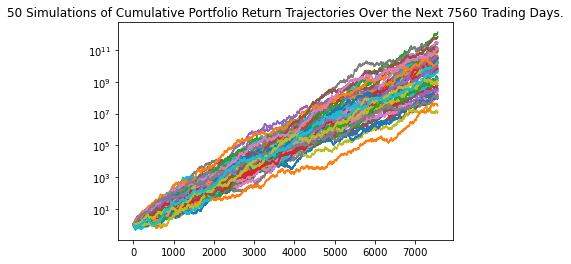

In [20]:
line_plot_2 = mc_2.plot_simulation()
line_plot_2.set_yscale('log')
fig_2 = line_plot_2.figure

#Save Figure as PNG for later use
fig_2.savefig('MC_2.png', bbox_inches='tight', pad_inches=0.1)

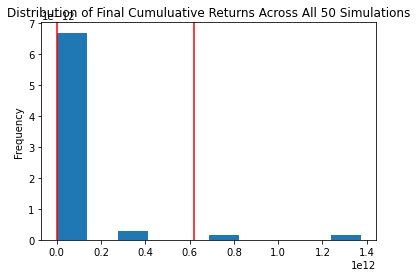

In [21]:
#Plot of probability distribution and confidence intervals
dist_plot = mc_2.plot_distribution()

In [22]:
# Create summary statistics from the Monte Carlo simulation results and print it
mc_2_sts = mc_2.summarize_cumulative_return()
print(mc_2_sts)

count           5.000000e+01
mean            7.858654e+10
std             2.201234e+11
min             1.229698e+07
25%             8.727356e+08
50%             9.373083e+09
75%             4.050207e+10
max             1.374131e+12
95% CI Lower    4.393266e+07
95% CI Upper    6.185965e+11
Name: 7560, dtype: float64
